In [1]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 22.7 MB/s eta 0:00:00


In [2]:
!pip install opencv-python
!pip install numpy

In [22]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt


In [4]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Fly AI/mediapipe/pose_landmarker_full.task'

In [6]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options = BaseOptions(model_asset_path = model_path),
    running_mode = VisionRunningMode.IMAGE)
detector = vision.PoseLandmarker.create_from_options(options)

In [35]:
numpy_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fly AI/mediapipe/male.jpg')
image_height, image_width = numpy_image.shape[:2]
mp_image = mp.Image(image_format =mp.ImageFormat.SRGB, data= numpy_image)

In [8]:
detection_result = detector.detect(mp_image)
pose_landmarks_list = detection_result.pose_landmarks
landmarks = pose_landmarks_list[0]

In [9]:
print(landmarks)

[NormalizedLandmark(x=0.5940964818000793, y=0.1386396288871765, z=-0.997409462928772, visibility=0.9999915361404419, presence=0.9999366998672485), NormalizedLandmark(x=0.6166601181030273, y=0.1241457462310791, z=-0.9329776763916016, visibility=0.9999663829803467, presence=0.9997839331626892), NormalizedLandmark(x=0.6266593933105469, y=0.12437322735786438, z=-0.9328848719596863, visibility=0.9999628067016602, presence=0.9997647404670715), NormalizedLandmark(x=0.638361930847168, y=0.12478139996528625, z=-0.932664692401886, visibility=0.9999597072601318, presence=0.9997389912605286), NormalizedLandmark(x=0.5781809091567993, y=0.12526488304138184, z=-0.9368375539779663, visibility=0.9999741315841675, presence=0.9998241066932678), NormalizedLandmark(x=0.5634915828704834, y=0.1260826289653778, z=-0.9369145631790161, visibility=0.9999738931655884, presence=0.9998220801353455), NormalizedLandmark(x=0.5500134825706482, y=0.1268465220928192, z=-0.9369257092475891, visibility=0.9999749660491943, 

In [10]:
nose_landmark = landmarks[0]
print(nose_landmark)

NormalizedLandmark(x=0.5940964818000793, y=0.1386396288871765, z=-0.997409462928772, visibility=0.9999915361404419, presence=0.9999366998672485)


In [11]:
nose_landmark_x = int(nose_landmark.x * image_width)
nose_landmark_y = int(nose_landmark.y * image_height)
visibility = nose_landmark.visibility

print(f'Nose:({nose_landmark_x},{nose_landmark_y},{visibility})')

Nose:(181,84,0.9999915361404419)


In [42]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Fly AI/mediapipe/male.jpg'
image = cv2.imread(image_path)
height, width = image.shape[:2]
# image_height, image_width = numpy_image.shape[:2]

In [43]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

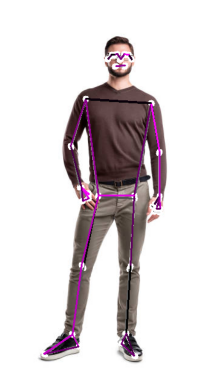

In [45]:
import random
def detect_pose_landmarks(image):
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results = pose.process(image)
        return results.pose_landmarks

# 랜드마크 포인트와 연결선 그리기
def draw_pose_landmarks(image, landmarks):
    for landmark in landmarks.landmark:
        x, y = int(landmark.x * width), int(landmark.y * height)
        cv2.circle(image, (x, y), 5, (255, 255, 255), -1)  # 흰색 원 그리기

    connections = mp_pose.POSE_CONNECTIONS
    for connection in connections:
        random_value = random.randint(0, 255)
        start_idx, end_idx = connection
        start_point = landmarks.landmark[start_idx]
        end_point = landmarks.landmark[end_idx]
        start_x, start_y = int(start_point.x * width), int(start_point.y * height)
        end_x, end_y = int(end_point.x * width), int(end_point.y * height)

        color = (random_value, 0, random_value)   # 각각 다른 색상 선택
        cv2.line(image, (start_x, start_y), (end_x, end_y), color, 2)  # 선 그리기

# 포즈 랜드마크 검출 및 그리기
pose_landmarks = detect_pose_landmarks(image)
if pose_landmarks is not None:
    draw_pose_landmarks(image, pose_landmarks)

# 결과 이미지 보여주기
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 제거
plt.show()